In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from biodata.delimited import DelimitedWriter
import json
import biodataplot.genomeview as gv
import biodataplot.utils as bpu

In [2]:
import matplotlib
from pathlib import Path
font_dir = Path.cwd().parent / "font"
for font in ["Arial.ttf", "Arial_Bold.ttf"]:
    matplotlib.font_manager.fontManager.addfont(font_dir / font)
matplotlib.rcParams["font.family"] = "Arial"
bfontsize = 12
sfontsize = 8

In [3]:
PROJECT_DIR_d = "/fs/cbsuhy02/storage/yc2553/yc2553/projects/TRE_directionality/PROcap/"
PROJECT_DIR_r = "/fs/cbsuhy02/storage/yc2553/yc2553/projects/TRE_directionality/resources/"
PROJECT_DIR_o = "/fs/cbsuhy02/storage/yc2553/yc2553/projects/TRE_directionality/output/"

# Data preparation

In [4]:
s = "HCT116"
ps = ["divergent", "unidirectional"]
ds = ["proximal", "distal"]
ts = ["maxTSS", "minTSS"]
ks = ["pl", "mn"]

In [5]:
rpms = {"0h, rep1": [f"{PROJECT_DIR_d}Alignments/CTCF_U1_5{k}_rpm.bw" for k in ks],
	   "0h, rep2": [f"{PROJECT_DIR_d}Alignments/CTCF_U2_5{k}_rpm.bw" for k in ks],
	   "6h, rep1": [f"{PROJECT_DIR_d}Alignments/CTCF_T1_5{k}_rpm.bw" for k in ks],
	   "6h, rep2": [f"{PROJECT_DIR_d}Alignments/CTCF_T2_5{k}_rpm.bw" for k in ks],
		}

The history saving thread hit an unexpected error (OperationalError('disk I/O error')).History will not be written to the database.


In [6]:
inputfile = f"{PROJECT_DIR_o}FIMO/{s}_CTCF_pos.json"
with open(inputfile, "r") as f:
	motifs = json.load(f)

In [7]:
outputfile = f"{PROJECT_DIR_o}FIMO/{s}_CTCF_pos.bed"
with DelimitedWriter(outputfile) as dw:
	for e in motifs:
		chrom = e.split("_")[0]
		dw.write([chrom, motifs[e][1], motifs[e][2]])

# Browser shots

In [8]:
def plot_example(region, color, outputfile):
	data = {}
	for m in rpms:
		data[f"PRO-cap ({m})"] = rpms[m]
	data["CTCF ChIP (0h)"] = f"{PROJECT_DIR_r}other/GSE179540/GSM5420199_I_Con_CTCF_hg38.bw"
	data["CTCF ChIP (6h)"] = f"{PROJECT_DIR_r}other/GSE179540/GSM5420200_I_IAA_CTCF_hg38.bw"
	data["CTCF motif"] = f"{PROJECT_DIR_o}FIMO/{s}_CTCF_pos.bed"
	
	# formatters = {}
	formatters = {
			"CTCF ChIP (0h)": {"plot_kw": {"fill_kw":{"color":color}}},
			"CTCF ChIP (6h)": {"plot_kw": {"fill_kw":{"color":color}}},
			"CTCF motif": {"plot_kw": {"facecolor":color}, "anno_vspace": 0}
			}
	height_ratios = {}
	for k in data:
		if "PRO-cap" in k:
			formatters[k] = {"yscale":"asym_pos_neg", "plot_kw":{"width":3}}
			height_ratios[k] = 8
		elif "ChIP" in k:
			height_ratios[k] = 5
		else:
			height_ratios[k] = 3
	
	fig = gv.plot_genome_view(
		region,
		data = data,
		formatters = formatters,
		height_ratios = height_ratios,
		group_autoscales = [[k for k in data if "PRO-cap" in k],
							[k for k in data if "ChIP" in k]
						   ],
		coordinate_kw = {"major_coordinate_unit":150}
		)
	
	bpu.plt_change_figure_properties(
		fig,
		**{"fig_prop": {"size_inches":[3, 2.8]},
		"fig_suptitle_kwargs": {"fontsize":bfontsize, "fontweight":"bold"},
		"xticklabels_prop": {"fontsize":sfontsize},
		"yticklabels_prop": {"fontsize":sfontsize},
		"ylabel_prop": {"fontsize":bfontsize, "fontweight":"bold"},
		"xlabel_prop": {"fontsize":bfontsize, "fontweight":"bold"}
		},
		title_prop = {"text": ""}
		)

	bpu.plt_change_figure_properties(
		fig, 
		ax_targets=[-1],
		xlabel_prop={"text":f"Genomic position ({region.split(':')[0]})"}
		)

	for i in range(len(data)):
		fig.axes[i].yaxis.set_label_coords(-0.2, 0.5)
		fig.axes[i].yaxis.set_major_formatter(lambda s, pos: f"{s:.0f}")
		
	fig.savefig(outputfile, bbox_inches="tight", dpi=300)

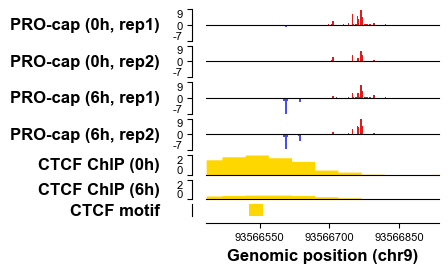

In [9]:
# Upregulated, minTSS, divergent distal

region = "chr9:93566435-93566936"
color = "#FFD700"
outputfile = f"{PROJECT_DIR_o}figures/Fig4a.pdf"
plot_example(region, color, outputfile)

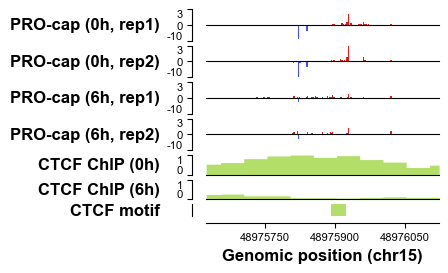

In [10]:
# Downregulated, maxTSS, divergent distal

region = "chr15:48975623-48976124"
color = "#b3de69"
outputfile = f"{PROJECT_DIR_o}figures/Fig4b.pdf"
plot_example(region, color, outputfile)